<a href="https://colab.research.google.com/github/FernandaRMuniz/CrimesRJ/blob/main/REGRESS%C3%83O_LINEAR%20%20CRIMES%20NO%20ESTADO%20DO%20RIO%20DE%20JANEIRO%20ENTRE%202020%20E%202022.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [19]:
import pandas as pd
import numpy as np #Biblioteca para cálculos numéricos
import matplotlib.pyplot as plt #Para criar gráficos
from sklearn.linear_model import LinearRegression #Biblioteca que permite realizar a regressão linear
import seaborn as sns

In [2]:
data = pd.read_csv('/content/crimes.csv', sep=';', encoding='latin1')

In [3]:
data

,fmun_cod,município,ano,mes,mes_ano,regiao,hom_doloso,lesao_corp_morte,latrocinio,cvli,...,cmp,cmba,ameaca,pessoas_desaparecidas,encontro_cadaver,encontro_ossada,pol_militares_mortos_serv,pol_civis_mortos_serv,registro_ocorrencias,fase
0,3300100,Angra dos Reis,2020,1,2020m01,Interior,12,0,0,12,...,15,0,49,8,0,0,0,0,383,3
1,3300159,Aperibé,2020,1,2020m01,Interior,1,0,0,1,...,0,0,6,1,0,0,0,0,35,3
2,3300209,Araruama,2020,1,2020m01,Interior,4,0,0,4,...,12,0,65,2,0,0,0,0,569,3
3,3300225,Areal,2020,1,2020m01,Interior,0,0,0,0,...,0,0,5,0,0,0,0,0,14,3
4,3300233,Armação dos Búzios,2020,1,2020m01,Interior,3,0,0,3,...,4,0,26,1,1,0,0,0,355,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3307,3306008,Três Rios,2022,12,2022m12,Interior,2,0,0,2,...,18,1,40,2,0,0,0,0,342,3
3308,3306107,Valença,2022,12,2022m12,Interior,0,0,0,0,...,5,2,43,0,0,0,0,0,233,3
3309,3306156,Varre-Sai,2022,12,2022m12,Interior,0,0,0,0,...,0,0,3,0,0,0,0,0,16,3
3310,3306206,Vassouras,2022,12,2022m12,Interior,0,0,0,0,...,2,0,14,0,0,0,0,0,118,3


In [4]:
data_crimes = data.drop(columns=['fmun_cod','município','regiao','mes','mes_ano','total_roubos','total_furtos','registro_ocorrencias','fase'])

In [5]:
data_crimes

,ano,hom_doloso,lesao_corp_morte,latrocinio,cvli,hom_por_interv_policial,letalidade_violenta,tentat_hom,lesao_corp_dolosa,estupro,...,apf,aaapai,cmp,cmba,ameaca,pessoas_desaparecidas,encontro_cadaver,encontro_ossada,pol_militares_mortos_serv,pol_civis_mortos_serv
0,2020,12,0,0,12,7,19,4,49,4,...,32,8,15,0,49,8,0,0,0,0
1,2020,1,0,0,1,0,1,0,3,0,...,1,0,0,0,6,1,0,0,0,0
2,2020,4,0,0,4,0,4,1,50,3,...,26,4,12,0,65,2,0,0,0,0
3,2020,0,0,0,0,0,0,0,3,0,...,0,0,0,0,5,0,0,0,0,0
4,2020,3,0,0,3,0,3,2,23,2,...,16,2,4,0,26,1,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3307,2022,2,0,0,2,0,2,0,26,2,...,32,9,18,1,40,2,0,0,0,0
3308,2022,0,0,0,0,0,0,1,33,2,...,13,1,5,2,43,0,0,0,0,0
3309,2022,0,0,0,0,0,0,0,3,0,...,1,0,0,0,3,0,0,0,0,0
3310,2022,0,0,0,0,0,0,0,18,1,...,14,0,2,0,14,0,0,0,0,0


In [6]:
# identificar todas colunas para criar uma única.
crime_columns = data_crimes.columns.difference(['ano'])

In [7]:
crime_columns

Index(['aaapai', 'ameaca', 'apf', 'apreensao_drogas',
       'apreensao_drogas_sem_autor', 'cmba', 'cmp', 'cvli', 'encontro_cadaver',
       'encontro_ossada', 'estelionato', 'estupro', 'extorsao',
       'furto_bicicleta', 'furto_celular', 'furto_coletivo',
       'furto_transeunte', 'furto_veiculos', 'hom_culposo', 'hom_doloso',
       'hom_por_interv_policial', 'latrocinio', 'lesao_corp_culposa',
       'lesao_corp_dolosa', 'lesao_corp_morte', 'letalidade_violenta',
       'outros_furtos', 'outros_roubos', 'pessoas_desaparecidas',
       'pol_civis_mortos_serv', 'pol_militares_mortos_serv', 'posse_drogas',
       'recuperacao_veiculos', 'roubo_apos_saque', 'roubo_banco',
       'roubo_bicicleta', 'roubo_carga', 'roubo_celular', 'roubo_comercio',
       'roubo_conducao_saque', 'roubo_cx_eletronico', 'roubo_em_coletivo',
       'roubo_residencia', 'roubo_rua', 'roubo_transeunte', 'roubo_veiculo',
       'sequestro', 'sequestro_relampago', 'tentat_hom', 'trafico_drogas'],
      dtype='

In [8]:
data_crimes['qntd_crimes'] = data[crime_columns].sum(axis=1) # Criação de uma nova coluna chamada qntd_crimes com o somatório de valores de todas as colunas de crimes

In [9]:
data_crimes # Coluna qntd_crimes entrou como ultima coluna da base.

,ano,hom_doloso,lesao_corp_morte,latrocinio,cvli,hom_por_interv_policial,letalidade_violenta,tentat_hom,lesao_corp_dolosa,estupro,...,aaapai,cmp,cmba,ameaca,pessoas_desaparecidas,encontro_cadaver,encontro_ossada,pol_militares_mortos_serv,pol_civis_mortos_serv,qntd_crimes
0,2020,12,0,0,12,7,19,4,49,4,...,8,15,0,49,8,0,0,0,0,437
1,2020,1,0,0,1,0,1,0,3,0,...,0,0,0,6,1,0,0,0,0,37
2,2020,4,0,0,4,0,4,1,50,3,...,4,12,0,65,2,0,0,0,0,529
3,2020,0,0,0,0,0,0,0,3,0,...,0,0,0,5,0,0,0,0,0,12
4,2020,3,0,0,3,0,3,2,23,2,...,2,4,0,26,1,1,0,0,0,286
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3307,2022,2,0,0,2,0,2,0,26,2,...,9,18,1,40,2,0,0,0,0,329
3308,2022,0,0,0,0,0,0,1,33,2,...,1,5,2,43,0,0,0,0,0,218
3309,2022,0,0,0,0,0,0,0,3,0,...,0,0,0,3,0,0,0,0,0,21
3310,2022,0,0,0,0,0,0,0,18,1,...,0,2,0,14,0,0,0,0,0,150


In [10]:
data_ano = data_crimes.groupby('ano')['qntd_crimes'].sum().reset_index() # Agrupar valores da coluna de qnt_crimes por ano

In [11]:
data_ano # Visualizando dataframe

,ano,qntd_crimes
0,2020,602792
1,2021,625149
2,2022,726245


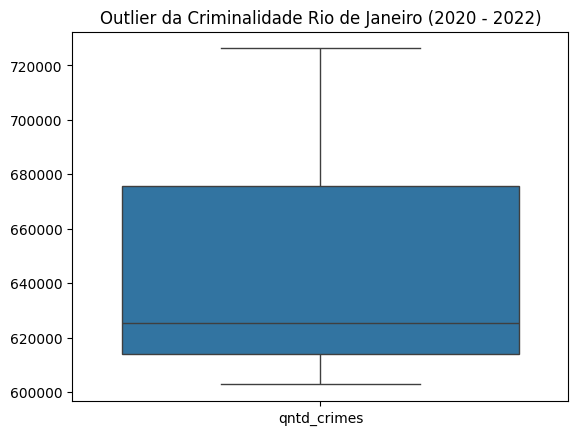

In [20]:
totalCrimes = data_ano.drop(columns=['ano'])
sns.boxplot(totalCrimes)
plt.title('Outlier da Criminalidade Rio de Janeiro (2020 - 2022)')
plt.show()

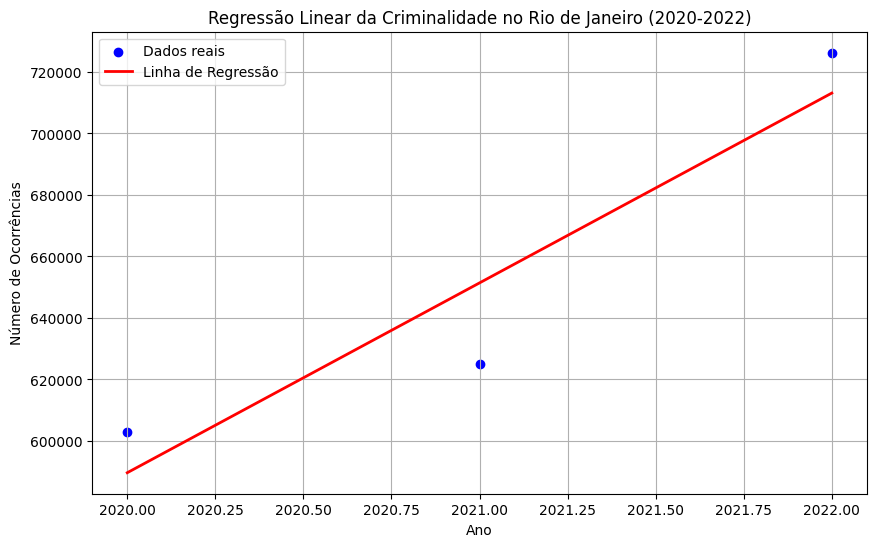

In [12]:
# Definindo os eixos x e y

x = data_ano[['ano']]
y = data_ano['qntd_crimes']

# Criar instância do modelo de regressão linear e ajustar modelo com dados x e y
model = LinearRegression() #Encontra relaçao entre x e y
model.fit(x, y) #Ajusta os parâmetros

# fazer previsões da relação x y
y_pred = model.predict(x)

# Visual do gráfico
plt.figure(figsize=(10, 6))
plt.scatter(data_ano['ano'], y, color='blue', label='Dados reais')
plt.plot(data_ano['ano'], y_pred, color='red', linewidth=2, label='Linha de Regressão')

# Configurações do gráfico
plt.title('Regressão Linear da Criminalidade no Rio de Janeiro (2020-2022)')
plt.xlabel('Ano')
plt.ylabel('Número de Ocorrências')
plt.legend()
plt.grid(True)

#Exibe o gráfico
plt.show()